<a href="https://colab.research.google.com/github/IamBansal/Python/blob/main/Object_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2   

In [ ]:
import matplotlib.pyplot as plt  

In [ ]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt "
frozen_model="frozen_inference_graph.pb"

In [ ]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [ ]:
classLabels = []  # Empty List of Python
file_name="C://Users//vpcho//ML Projects//Labels.txt"
with open(file_name, "rt") as fpt:
    classLabels = fpt.read().rstrip("\n").split("\n")

In [ ]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
print(len(classLabels))

80


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000111F3EB1DD0>

In [ ]:
#Read an image

img=cv2.imread("C://Users//vpcho//ML Projects//Manwithcar.png")

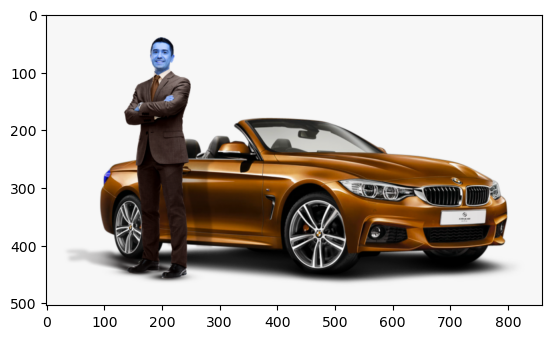

In [ ]:
plt.imshow(img)  ##bgr: blue green red

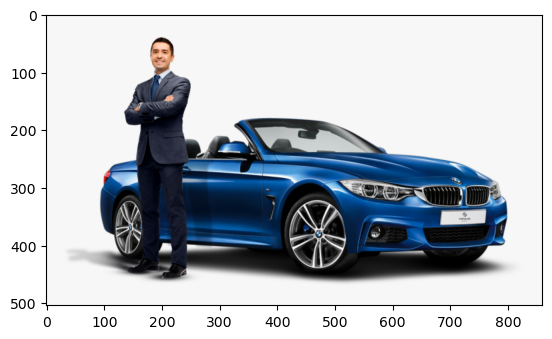

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

In [ ]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [ ]:
print(ClassIndex)

[1 3]


In [ ]:
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

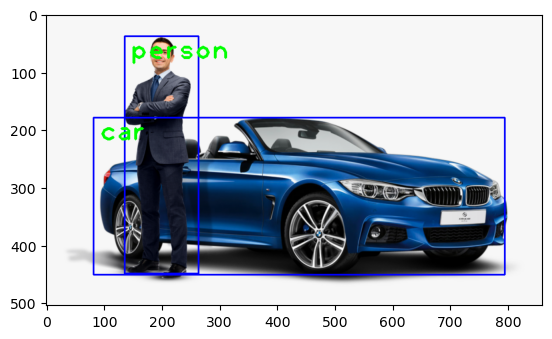

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Object Detection in a Live Video

In [ ]:
video=cv2.VideoCapture(1)

if not video.isOpened():
    video=cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Cannot Open the video")
    
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame=video.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox): 
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow("Object Detection Demonstration", frame)
    
    if cv2.waitKey(2) & 0xff==ord("q"):
        break
      

video.release()
cv2.destroyAllwindows()